In [12]:
from object import *
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
p3_mock = Test("example.csv")
norm_marks = p3_mock.marks(norm=True)
full_marks = p3_mock.marks()
total_marks = p3_mock.get_total_marks()

AttributeError: 'DataFrame' object has no attribute 'add_total_mark'

<Axes: xlabel='Question', ylabel='Mark'>

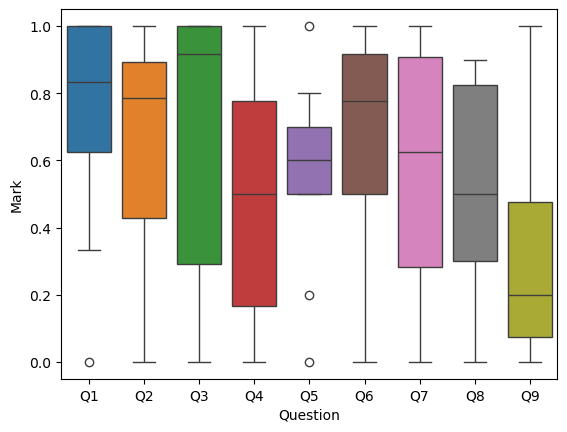

In [16]:
sns.boxplot(data=norm_marks[norm_marks['Part'].str.contains('Total',na=False)], x = 'Question', y = 'Mark',hue='Question')

<Axes: xlabel='Question', ylabel='Mark'>

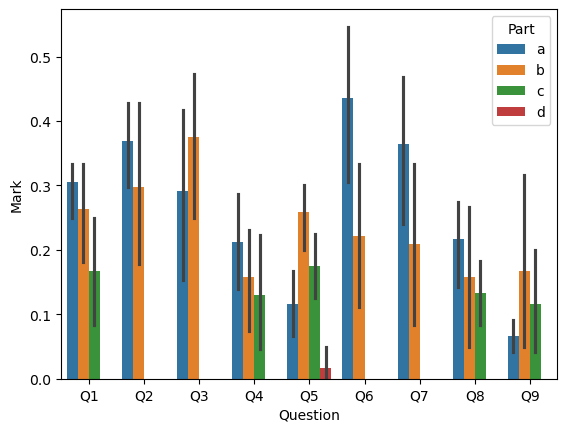

In [30]:
sns.barplot(data=norm_marks, x = 'Question',y='Mark',hue='Part')

In [ ]:
            
        

        for q_num in self.__question_nos:
            # Locate rows in available_marks where the question number matches
            location = self.available_marks["Question"].str.contains(q_num)

            # Get the marks available for the specific question
            q_mark = self.available_marks.loc[location, "Marks_Available"].values

            # Apply normalization: divide the marks in mark_table by the marks available
            for col in self.norm_table.columns:
                if q_num in col:
                    self.norm_table[col] = self.mark_table[col] / q_mark[0]
                elif col == "Total":
                    self.norm_table[col] = (
                        self.mark_table[col]
                        / self.available_marks["Marks_Available"].iloc[-1]
                    )